In [2]:
#Excelデータを解析で扱えるようにする
#データ読み込みのためのpandasライブラリをロードする
import pandas as pd
#Excelファイルをwineという名前で読み込む
wine = pd.read_excel('wine.xlsx')
#wineの中身を表示する
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
#sklearnライブラリのtreeから決定木の読み込み
from sklearn.tree import DecisionTreeClassifier
#決定木構造を書き出すための関数の読み込み
from sklearn.tree import export_graphviz

#データを説明変数Xと目的変数Yに分ける
X = wine.drop('quality', axis=1)
Y = wine.quality

#決定木を学習させる
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)

#学習結果を出力させる
export_graphviz(clf, out_file="wine.dot",feature_names=X.columns, impurity=False, filled=True)


In [6]:
import numpy as np

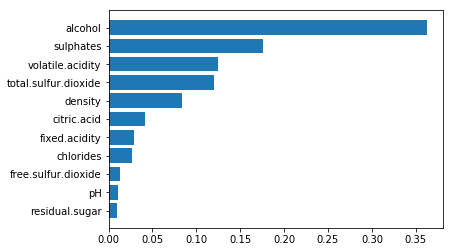

In [7]:
#sklearnライブラリのtreeからランダムフォレストの読み込み
from sklearn.ensemble import RandomForestClassifier
#plotのためのライブラリをロード
import matplotlib.pyplot as plt
%matplotlib inline
#データを説明変数Xと目的変数Yに分ける
X = wine.drop('quality', axis=1)
Y = wine.quality
#ランダムフォレストを学習させる
clf = RandomForestClassifier(random_state=0, max_depth=3, n_estimators=150)
clf = clf.fit(X, Y)

#変数の重要度を確認する．
#説明変数から変数名を読み込む
features = X.columns
#ランダムフォレストの結果から，変数の重要度を読み込む
importances = clf.feature_importances_
#重要度の順番を降順に確認する
indices = np.argsort(importances)

#重要度を降順に並び替え横棒プロットする
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.show()


In [10]:
#混合行列のための関数を読み込む
from sklearn.metrics import confusion_matrix
#構築したランダムフォレストの学習器で予測を行う
pred = clf.predict(X)
#混合行列で精度を確認する
confusion_matrix(Y,pred)

array([[  0,   0,   9,   1,   0,   0],
       [  0,   0,  34,  19,   0,   0],
       [  0,   0, 542, 139,   0,   0],
       [  0,   0, 204, 434,   0,   0],
       [  0,   0,   9, 179,  11,   0],
       [  0,   0,   0,  18,   0,   0]], dtype=int64)